# Trabajo Semanal 11
### Renata Salvati Dávila
***

<img src="./Ejercicio1.png" align="center" width="1500" /> 

<img src="./Hoja1.jpeg" align="center" /> 
<img src="./Hoja2.jpeg" align="center" />

In [1]:
import sympy as sp

from pytc2.remociones import remover_polo_jw, remover_polo_dc
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display, Markdown

s = sp.symbols('s', complex=True)

In [2]:
Y11 = sp.nsimplify((3*s*(s**2+7/3))/((s**2 + 2)*(s**2+5)))

print_latex(a_equal_b_latex_s('Y_{11}(s)', Y11))

Z = 1/Y11

Za, C1 = remover_polo_dc(Z, omega_zero = 1)

print_subtitle('Primer remoción (parcial): capacitor en serie')
print_latex(a_equal_b_latex_s('C_1', C1))
print_subtitle('Impedancia resultante')
print_latex(a_equal_b_latex_s('Z_a', Za))

<IPython.core.display.Math object>

#### Primer remoción (parcial): capacitor en serie

<IPython.core.display.Math object>

#### Impedancia resultante

<IPython.core.display.Math object>

In [3]:
Ya = 1/Za

Yb, k1, L1, C2 = remover_polo_jw(Ya, omega = 1, isImpedance = False)

print_subtitle('Segunda remoción: Tanque LC en derivación')
print_latex(a_equal_b_latex_s('L_{1}', L1))
print_latex(a_equal_b_latex_s('C_{2}', C2))

print_subtitle('Admitancia resultante')
print_latex(a_equal_b_latex_s('Y_b', Yb))

#### Segunda remoción: Tanque LC en derivación

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Admitancia resultante

<IPython.core.display.Math object>

In [4]:
Zb = 1/Yb

Zc, C3 = remover_polo_dc(Zb)

print_subtitle('Tercer remoción: capacitor en serie')
print_latex(a_equal_b_latex_s('C_3', C3))
print_subtitle('Impedancia resultante')
print_latex(a_equal_b_latex_s('Z_c', Zc))

#### Tercer remoción: capacitor en serie

<IPython.core.display.Math object>

#### Impedancia resultante

<IPython.core.display.Math object>

In [5]:
L2 = Zc

print_subtitle('Cuarta remoción: inductor en serie')
print_latex(a_equal_b_latex_s('L_2', L2))

#### Cuarta remoción: inductor en serie

<IPython.core.display.Math object>

#### Red resultante

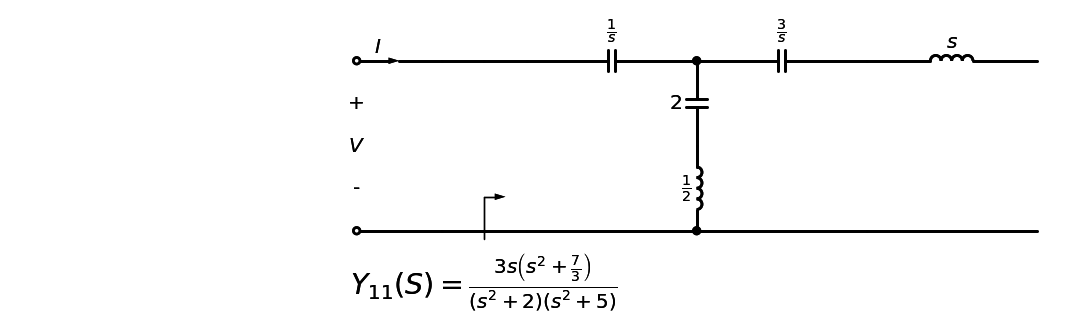

In [6]:
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_funcion_exc_abajo, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_tanque_RC_derivacion, dibujar_espacio_derivacion, dibujar_tanque_derivacion, Capacitor, Inductor, Resistor, ResistorIEC

print_subtitle('Red resultante')

d = dibujar_puerto_entrada('', voltage_lbl=('+', '$V$', '-'), current_lbl= '$I$')
d, zz_lbl = dibujar_funcion_exc_abajo(d, 'Y_{11}(S)', Y11, hacia_salida=True, k_gap_width=0.5)
d = dibujar_elemento_serie(d, Capacitor, C1)
d = dibujar_tanque_derivacion(d, L1, C2)
d = dibujar_elemento_serie(d, Capacitor, C3)
d = dibujar_elemento_serie(d, Inductor, L2)

display(d)

<img src="./Circuito1.png" align="center" /> 
<img src="./Simulacion1.png" align="center" />

<img src="./Ejercicio2.png" align="center" width="1500" /> 

<img src="./Hoja3.jpeg" align="center" /> 
<img src="./Hoja4.jpeg" align="center" /> 
<img src="./Hoja5.jpeg" align="center" /> 

In [7]:
import numpy as np
from pytc2.remociones import remover_valor_en_infinito, remover_polo_sigma

In [8]:
Z11 = sp.nsimplify(((s + 2)*(s + 4))/(s*(s + 3)))

print_latex(a_equal_b_latex_s('Z_{11}(s)', Z11))

Z, R1 = remover_valor_en_infinito(Z11)


print_subtitle('Primer remoción: resistencia en serie')
print_latex(a_equal_b_latex_s('R_1', R1))
print_subtitle('Impedancia resultante')
print_latex(a_equal_b_latex_s('Z', Z))

<IPython.core.display.Math object>

#### Primer remoción: resistencia en serie

<IPython.core.display.Math object>

#### Impedancia resultante

<IPython.core.display.Math object>

In [9]:
#No encuentro función que resuelva directamente

C1 = 5/(2*s)
Za = (s + 1)/(2*s*(s + 3))

print_latex(a_equal_b_latex_s('C_1', C1))
print_subtitle('Impedancia resultante')
print_latex(a_equal_b_latex_s('Z_a', Za))

<IPython.core.display.Math object>

#### Impedancia resultante

<IPython.core.display.Math object>

In [10]:
Ya = 1/Za

Yb, YRC, R1, C2 = remover_polo_sigma(Ya, sigma = -1, isImpedance = False, isRC = True )

print_subtitle('Tercer remoción: Tanque RC en derivación')
print_latex(a_equal_b_latex_s('R_{1}', R1))
print_latex(a_equal_b_latex_s('C_{2}', C2))
print_subtitle('Admitancia resultante')
print_latex(a_equal_b_latex_s('Y_b', Yb))

#### Tercer remoción: Tanque RC en derivación

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Admitancia resultante

<IPython.core.display.Math object>

In [11]:
C3 = Yb

print_subtitle('Cuarta remoción: capacitor en derivación')
print_latex(a_equal_b_latex_s('C_3', C3))

#### Cuarta remoción: capacitor en derivación

<IPython.core.display.Math object>

In [12]:
print_subtitle('Red resultante')

d = dibujar_puerto_entrada('', voltage_lbl=('+', '$V$', '-'), current_lbl= '$I$')
d, zz_lbl = dibujar_funcion_exc_abajo(d, 'z_{11}(S)', Z11, hacia_salida=True, k_gap_width=0.5)
d = dibujar_elemento_serie(d, Resistor, R1)
d = dibujar_elemento_serie(d, Capacitor, C1)
d = dibujar_tanque_RC_derivacion(d, sym_R_label=R2, capacitor_lbl=C2)
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, Capacitor, C3)

display(d)

#### Red resultante

NameError: name 'R2' is not defined

<img src="./Circuito2.png" align="center" /> 
<img src="./Simulacion2.png" align="center" />